In [60]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
from natsort import natsorted

# Set the directory where the XML files are located
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/data")

# Get a list of the XML files in the directory
xml_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(".xml")]

# Initialize an empty dictionary to hold the RNAexpression data
rna_expression_data = {}

# Loop through each XML file
for xml_file in xml_files:

    # Parse the XML file
    tree = ET.parse(xml_file)

    # Get the root element of the XML file
    root = tree.getroot()

    # Find the tag wih the desired expression level entries
    rna_expression = root.find("./entry/rnaExpression[@assayType='consensusTissue']")
    
    # Loop through each data child tag of the rnaExpression tag
    for data in rna_expression.iter("data"):
        # Get the name of the tissue type
        tissueName = data.find('tissue').text
        # Get the nTPM value from tissue type
        expRNA_value = data.find("./level[@type='normalizedRNAExpression']").get('expRNA')
        expRNA_value = float(expRNA_value)
        # Add the tag name and value to the dictionary
        if tissueName not in rna_expression_data:
            rna_expression_data[tissueName] = expRNA_value
        else: raise Exception('a tissue type was found twice')

    # Convert the dictionary to a Pandas dataframe
    protName = root.find('entry').find('name').text
    try:
        rna_expression_df[protName] = rna_expression_data
    except NameError:
        rna_expression_df = pd.DataFrame.from_dict(rna_expression_data, orient='index', columns=[protName])

    # Empty the dict before the new file
    rna_expression_data = {}

# Sort the cols alphabetically
order = natsorted(list(rna_expression_df.columns))
rna_expression_df = rna_expression_df.reindex(order, axis=1)
# Save the resulting dataframe
rna_expression_df.to_csv(f'{directory}/tissueProtTable.csv')
rna_expression_df

,ICMT,PLEK,RCE1,SPTLC1,SPTLC2,SPTSSA,ZDHHC1,ZDHHC2,ZDHHC3,ZDHHC4,...,ZDHHC15,ZDHHC16,ZDHHC17,ZDHHC18,ZDHHC19,ZDHHC20,ZDHHC21,ZDHHC22,ZDHHC23,ZDHHC24
Adipose tissue,22.6,36.4,10.1,35.6,17.6,25.1,17.7,10.3,50.1,25.9,...,0.8,15.6,15.6,23.4,0.1,10.9,3.7,0.0,1.1,5.2
Adrenal gland,23.0,9.8,10.9,32.6,12.2,71.1,10.9,24.4,48.6,31.0,...,1.5,14.9,14.1,8.1,0.8,9.2,5.7,0.2,1.0,6.9
Amygdala,12.4,4.9,14.9,24.0,14.6,13.5,3.7,10.3,23.0,17.5,...,1.7,17.8,18.6,26.0,0.1,15.2,4.7,14.9,5.4,5.8
Appendix,13.6,99.4,7.2,27.3,12.6,21.1,1.8,11.0,25.7,16.2,...,0.3,10.2,12.1,27.4,0.3,17.6,4.6,0.0,3.0,3.3
Basal ganglia,18.1,7.1,15.1,27.0,26.7,13.6,3.5,8.9,21.5,19.4,...,1.7,18.5,20.4,24.6,0.1,52.9,5.8,15.3,7.3,4.5
Bone marrow,4.0,604.8,20.9,23.3,33.7,5.7,0.2,31.7,82.8,18.8,...,0.1,6.8,23.7,113.9,0.2,30.0,2.5,0.0,1.2,5.0
Breast,15.8,8.2,9.3,44.1,18.3,39.3,17.9,7.5,36.3,24.3,...,1.6,16.3,16.1,17.0,0.0,11.5,6.2,0.0,2.6,4.7
Cerebellum,18.2,6.0,17.9,26.0,24.0,13.8,3.2,43.9,27.9,19.4,...,1.8,20.3,23.1,25.7,0.0,51.8,12.7,25.9,0.0,4.2
Cerebral cortex,13.1,10.0,18.2,34.2,19.4,17.9,5.6,14.8,22.9,18.8,...,1.5,21.9,25.9,29.0,0.1,23.3,6.7,33.8,9.4,5.4
Cervix,20.3,6.9,10.7,43.1,15.2,21.0,27.1,13.4,42.2,24.4,...,1.6,15.0,15.8,12.9,0.0,16.2,6.2,0.1,1.4,3.6


In [61]:
'''
# Load the CSV file into a pandas dataframe
rna_expression_df = pd.read_csv('~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/data/tissueProtTable.csv', index_col=0)

rna_expression_df
'''
rna_expression_df1 = rna_expression_df.iloc[:,:6]
rna_expression_df1['ZDHHC17'] = rna_expression_df['ZDHHC17']
rna_expression_df_zinc = rna_expression_df.iloc[:,6:]
rna_expression_df_zinc

/tmp/ipykernel_120480/313011709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rna_expression_df1['ZDHHC17'] = rna_expression_df['ZDHHC17']


,ZDHHC1,ZDHHC2,ZDHHC3,ZDHHC4,ZDHHC5,ZDHHC6,ZDHHC7,ZDHHC8,ZDHHC9,ZDHHC11,...,ZDHHC15,ZDHHC16,ZDHHC17,ZDHHC18,ZDHHC19,ZDHHC20,ZDHHC21,ZDHHC22,ZDHHC23,ZDHHC24
Adipose tissue,17.7,10.3,50.1,25.9,29.0,19.5,33.0,31.6,28.2,1.9,...,0.8,15.6,15.6,23.4,0.1,10.9,3.7,0.0,1.1,5.2
Adrenal gland,10.9,24.4,48.6,31.0,21.7,19.9,28.1,31.2,12.0,0.9,...,1.5,14.9,14.1,8.1,0.8,9.2,5.7,0.2,1.0,6.9
Amygdala,3.7,10.3,23.0,17.5,8.3,15.2,19.0,13.8,39.2,8.0,...,1.7,17.8,18.6,26.0,0.1,15.2,4.7,14.9,5.4,5.8
Appendix,1.8,11.0,25.7,16.2,27.2,24.6,24.7,18.6,10.2,0.4,...,0.3,10.2,12.1,27.4,0.3,17.6,4.6,0.0,3.0,3.3
Basal ganglia,3.5,8.9,21.5,19.4,7.8,16.0,18.8,15.1,66.6,9.9,...,1.7,18.5,20.4,24.6,0.1,52.9,5.8,15.3,7.3,4.5
Bone marrow,0.2,31.7,82.8,18.8,29.2,21.8,64.2,10.7,5.4,0.5,...,0.1,6.8,23.7,113.9,0.2,30.0,2.5,0.0,1.2,5.0
Breast,17.9,7.5,36.3,24.3,25.8,22.7,26.8,30.4,24.3,2.1,...,1.6,16.3,16.1,17.0,0.0,11.5,6.2,0.0,2.6,4.7
Cerebellum,3.2,43.9,27.9,19.4,8.3,16.7,21.4,11.3,46.5,8.3,...,1.8,20.3,23.1,25.7,0.0,51.8,12.7,25.9,0.0,4.2
Cerebral cortex,5.6,14.8,22.9,18.8,9.5,18.9,18.6,26.4,52.5,13.0,...,1.5,21.9,25.9,29.0,0.1,23.3,6.7,33.8,9.4,5.4
Cervix,27.1,13.4,42.2,24.4,27.0,21.2,40.0,32.6,19.1,2.7,...,1.6,15.0,15.8,12.9,0.0,16.2,6.2,0.1,1.4,3.6


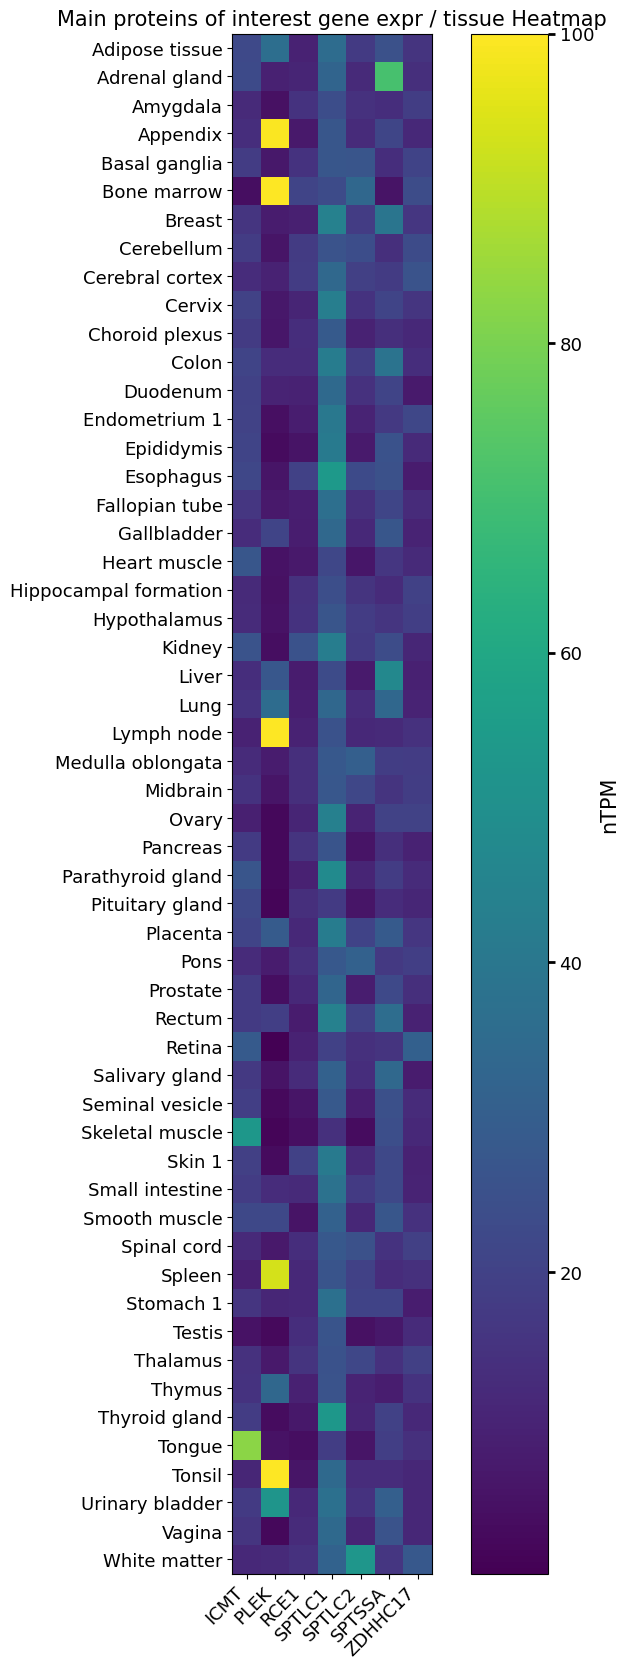

In [63]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 20))
df = rna_expression_df1
im = ax.imshow(df, cmap='viridis', vmax = 100)

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Main proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/mainProts.pdf')


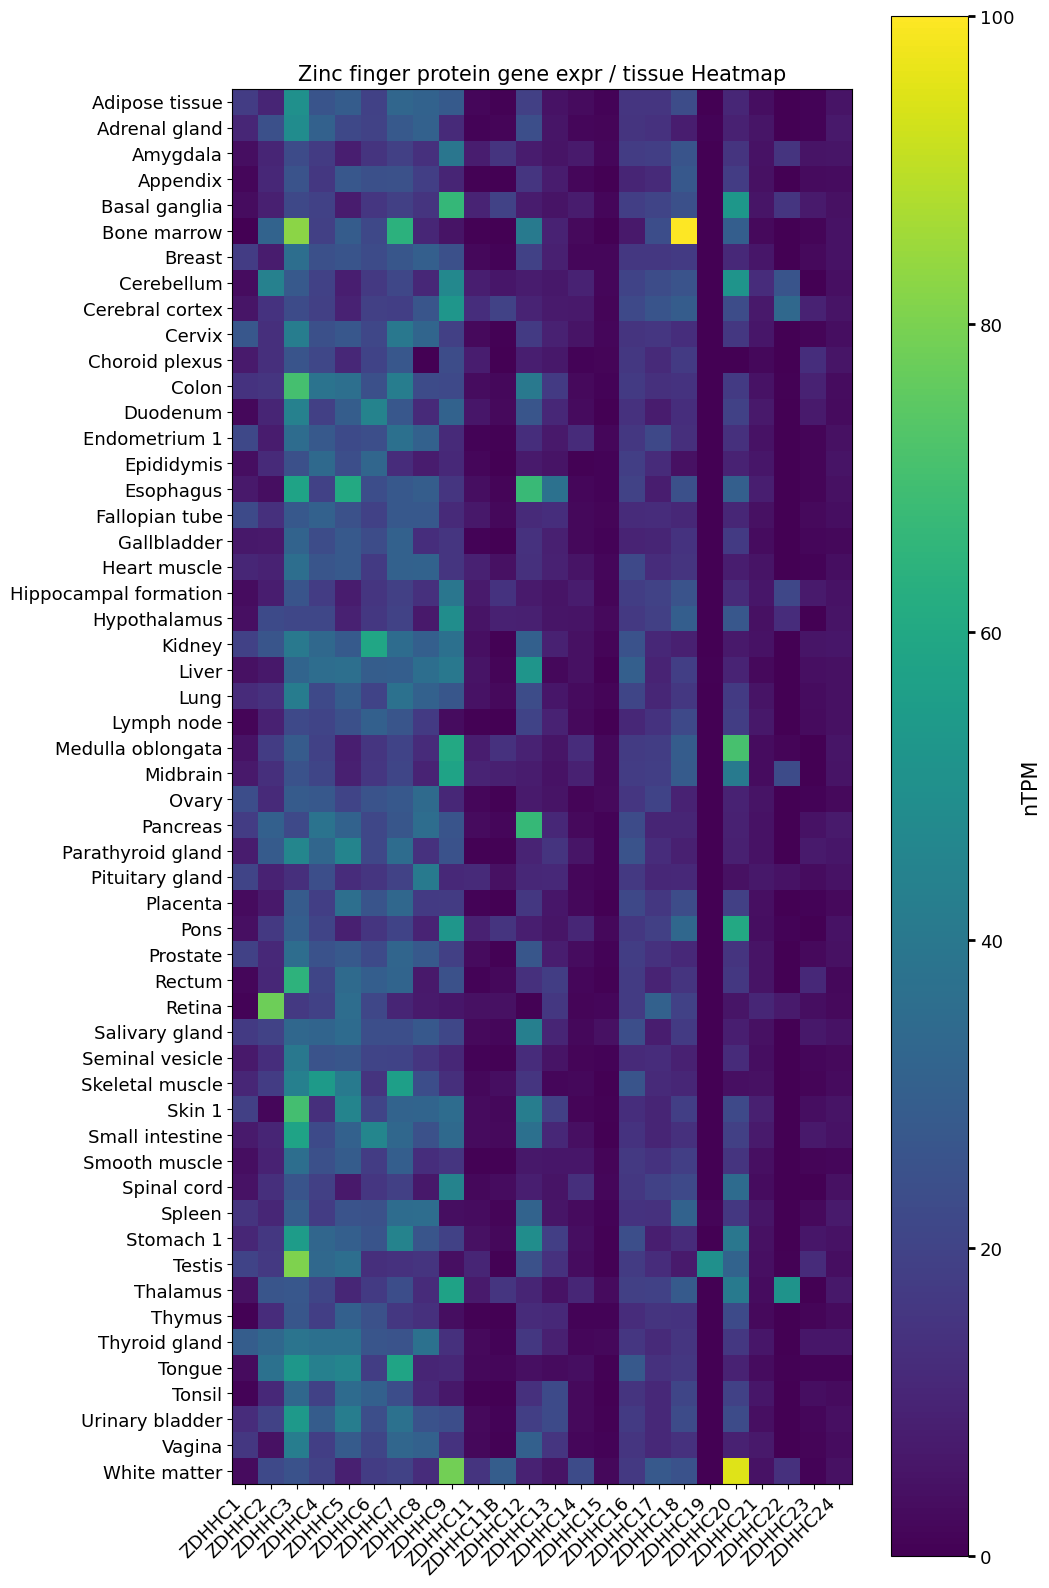

In [64]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 20))
df = rna_expression_df_zinc
im = ax.imshow(df, cmap='viridis', vmax = 100)

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Zinc finger protein gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
fig.savefig(f'{directory}/plots/zincProts.pdf')
